In [1]:
# import the necessary packages
import imutils
import time
import cv2
from IPython.display import clear_output
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np
from imutils.video import VideoStream

In [2]:
# Function to load image
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()
    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

In [23]:
# Load the camera
cam = cv2.VideoCapture(0)

In [4]:
# Function to load camera frames
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    #flip image for natural viewing
    #frame = cv2.flip(frame, 1)
    return frame

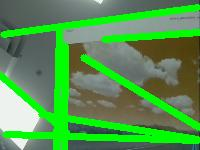

In [14]:
d = IPython.display.display("", display_id=1)
#d2 = IPython.display.display("", display_id=2)

In [24]:
# Main loop 
# Press 'i' twice to interrupt the loop 
# If the Red Camera LED is on, run the cam.release section of the code before proceeding 
while True:
    # Read the video feed
    img = get_frame(cam)
    # Resize the image for smoother loading
    img = imutils.resize(img, width=200, inter=cv2.INTER_LINEAR)

    # Convert the image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Apply edge detection to the image to reveal the outlines of the coins
    edged = cv2.Canny(gray, 75, 150)
    
    # Hough Transform
    lines = cv2.HoughLinesP(edged, 1, np.pi/180, 50, maxLineGap=50)
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            linesNew=cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 5)
            image = array_to_image(linesNew)
            d.update(image)


    if cv2.waitKey(1) & 0xFF == ord("q"):
        break


KeyboardInterrupt: 

In [22]:
# Make sure the camera resources are reslease 
cam.release()
IPython.display.clear_output()
print ("Stream stopped")
cv2.destroyAllWindows()

Stream stopped
